In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
!pip install category_encoders

In [2]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
tax_value=[]
for value in fraud['TaxableIncome']:
    if value<=30000:
        tax_value.append('Risky')
    else:
        tax_value.append('Good')
fraud['tax_value']=tax_value        
    

In [4]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Undergrad','MaritalStatus', 'Urban'])
fraud1= encoder.fit_transform(fraud)

In [5]:
fraud1

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,tax_value
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [6]:
fraud1=fraud1.drop(['TaxableIncome'], axis=1)
fraud1

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,tax_value
0,1,1,50047,10,1,Good
1,2,2,134075,18,1,Good
2,1,3,160205,30,1,Good
3,2,1,193264,15,1,Good
4,1,3,27533,28,2,Good
...,...,...,...,...,...,...
595,2,2,39492,7,1,Good
596,2,2,55369,2,1,Good
597,1,2,154058,0,1,Good
598,2,3,180083,17,2,Good


In [7]:
x=fraud1.iloc[:, :-1]
y= fraud1.iloc[:, -1]

In [8]:
kfold=KFold(n_splits=10, random_state=7, shuffle=True)

In [9]:
model=RandomForestClassifier(n_estimators=100, max_features=2)

In [10]:
result= cross_val_score(model, x,y, cv=kfold)
print(result.mean())

0.7516666666666667


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

#### Random Forest Classifier using Entropy criterion

In [13]:
model=RandomForestClassifier(criterion='entropy')

In [14]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [15]:
model.feature_importances_

array([0.04104471, 0.06042832, 0.53315874, 0.33163612, 0.03373211])

In [16]:
fn=['Undergrad','MaritalStatus','CityPopulation','WorkExperience','Urban']
feat_imp=pd.Series(model.feature_importances_, index=fn).sort_values(ascending=False)

In [17]:
feat_imp

CityPopulation    0.533159
WorkExperience    0.331636
MaritalStatus     0.060428
Undergrad         0.041045
Urban             0.033732
dtype: float64

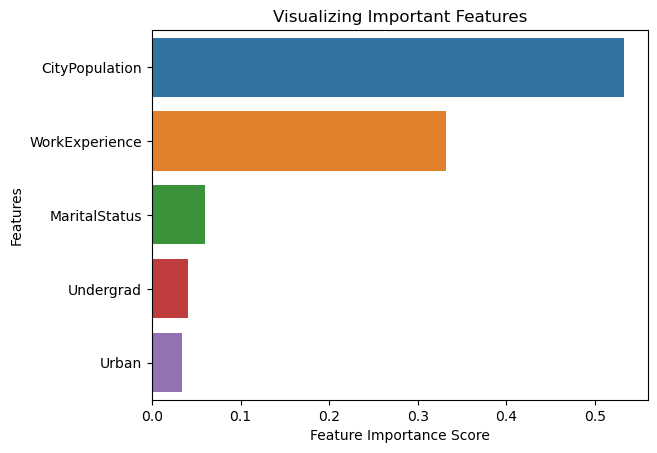

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.barplot(x=feat_imp, y=feat_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [22]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

Good     115
Risky      5
dtype: int64

In [23]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
 

In [24]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
tax_value,,
Good,89,5
Risky,26,0


In [25]:
np.mean(preds==y_test)

0.7416666666666667

#### Random Forest Classifier using Gini criterion

In [26]:
model_gini= RandomForestClassifier(criterion='gini')

In [27]:
model_gini.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7583333333333333